# Prova 1 - Acompanhamento de 1 ano de pacientes com diabetes

In [92]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Definição do Problema


As amostras apresentadas a seguir representam os dados de $m=442$ pacientes com diabetes. O objetivo consiste em estimar como o quadro de diabetes irá evoluir após 1 ano.

Mais especificamente, elas mostram a evolução no quadro de diabetes após 1 ano (y) em função de 10 características (atributos) medidos (x1,x2,...,x10).

O nosso objetivo é construir um modelo que depois possa ser usado para prever como será a evolução do quadro de diabetes de novos pacientes.

Temporalmente falando, os dados dos pacientes foram obtidos da seguinte forma: no dia 1, cada paciente teve os seguintes dados verificados:

- **x1:** Idade do paciente.
- **x2:** Sexo do paciente (codificado como 1 para masculino, 2 para feminino).
- **x3:** IMC: Índice de Massa Corporal, uma medida de gordura corporal baseada na altura e no peso.
- **x4:** PA: Pressão arterial média do paciente (ou BP, do inglês, blood pressure).
- **x5:** S1: Uma medida do soro sanguíneo (um dos seis indicadores de soro sanguíneo). Representa o nível total de colesterol.
- **x6:** S2: Uma medida do soro sanguíneo representando LDL (Lipoproteínas de Baixa Densidade).
- **x7:** S3: Uma medida do soro sanguíneo representando HDL (Lipoproteínas de Alta Densidade).
- **x8:** S4: Uma medida do soro sanguíneo representando triglicerídeos.
- **x9:** S5: Uma medida do soro sanguíneo representando o nível de lamotrigina (uma enzima hepática).
- **x10:** S6: Uma medida do soro sanguíneo representando os níveis de glicose.


No dia 365, cada paciente foi reavaliado. O médico atribuiu um score (uma pontuação) **y** que indica o quanto seu quadro de diabetes evoluiu durante o último ano.

- Pontuações mais altas (por exemplo, 150–200) indicam piora do diabetes e uma probabilidade crescente de complicações.
- Pontuação intermediária (por exemplo, 50-150) indica que a doença do paciente progrediu moderadamente ao longo do ano.
- Pontuações mais baixas (por exemplo, 20–50) indicam progressão estável ou mínima. Em geral, uma pontuação dentro desse intervalo indica que o paciente provavelmente está gerenciando bem a doença.

**OBS**: A pontuação é relativa, o que significa que compara a progressão de diferentes pacientes ao longo do mesmo período. A pontuação não possui uma interpretação direta no mundo real, como o nível de açúcar no sangue, por exemplo. Ao invés disso, ela representa um indicador agregado de como o diabetes de um paciente progrediu ao longo de um ano a partir do momento em que as características de entrada foram registradas.

Para mais informações sobre esse conjunto de dados e sobre outras análises, favor consultar o seguinte artigo científico:

Efron, B., Hastie, T., Johnstone, I., & Tibshirani, R. (2004). Least angle regression. *The Annals of Statistics*, 32(2), 407–499. https://doi.org/10.1214/009053604000000067


In [93]:
# Carregando os dados dos pacientes
df = pd.read_csv('diabetes.tab.txt', delimiter='\t', header=0) # header = 0 indica que a primeira linha contém o nome das colunas. Usar esse já que os dados estão delimitados por 'tabs'
#df = pd.read_csv('diabetes.tab.txt', delimiter=' ', header=0) # header = 0 indica que a primeira linha contém o nome das colunas. Usaria esse caso os dados estivessem delimitados por um único espaço

display(df)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


## Cálculo de correlação entre as variáveis do problema

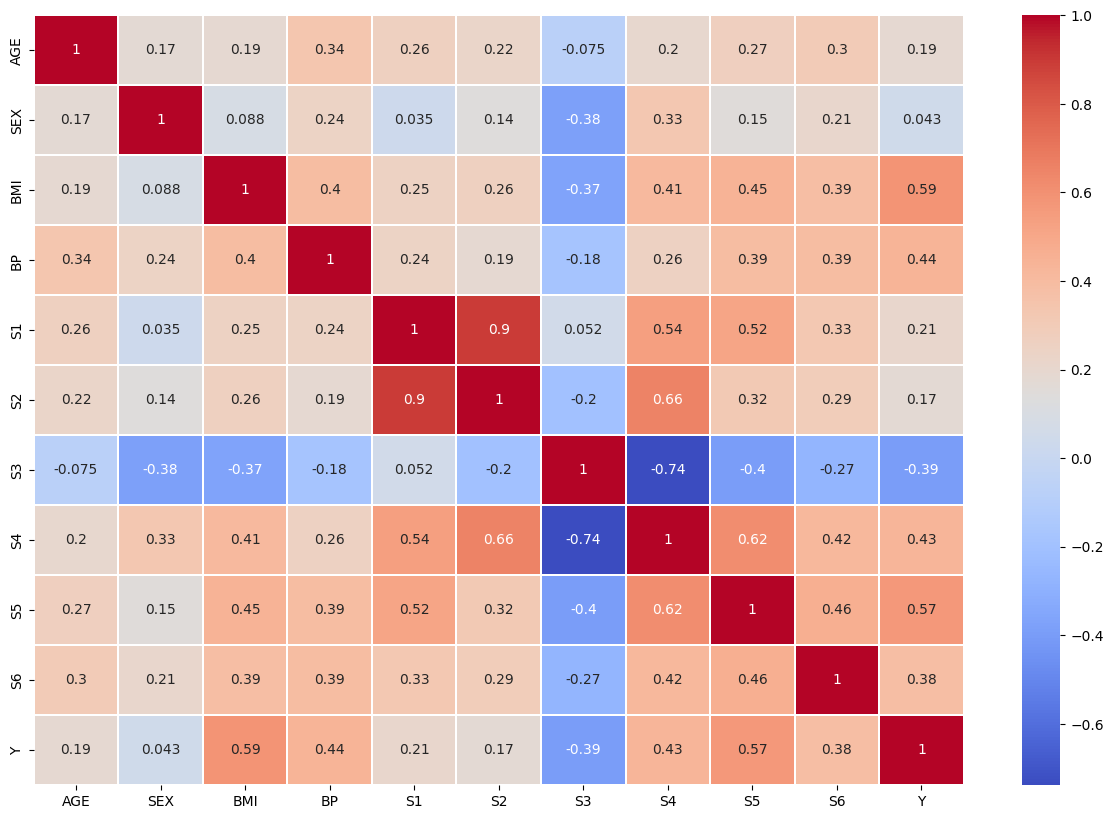

In [94]:
# Abaixo são realizados os cálculos de correlação entre as colunas da tabela
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.2)
plt.show()

Olhando a última linha da tabela acima, note que:

- S3 (nível HDL) é a única característica que possui uma correlação negativa com a variável alvo. Ou seja, este cálculo de correlação sugere que valores elevados de HDL tendem à diminuir a pontuação do paciente. De fato, sabe-se que níveis elevados de HDL geralmente são considerados bons, pois o HDL ajuda a remover o colesterol das artérias e transportá-lo de volta ao fígado, onde é processado e eliminado.

- Por outro lado, as demais características possuem uma correlação positiva. Isso significa que, quando elas aumentam, a pontuação do paciente também tende a aumentar. Nesse sentido, merecem destaque as características BMI, BP, S4, S5 e S6.

Por fim, note que a correlação entre sexo e pontuação parece ser desprezível, pois está muito próxima de zero.

In [95]:
X_trein_df = df.iloc[:, :-1] # cria novo dataframe com todas as características x1, x2, ..., x10
y_trein_df = df.iloc[:, -1] # cria novo dataframe com valor alvo para todas as amostras

In [96]:
# Transformando de Dataframe para numpy array:
X_trein = X_trein_df.to_numpy()
y_trein = y_trein_df.to_numpy()

print(f"X Shape: {X_trein.shape}")
print(f"y Shape: {y_trein.shape}")

X Shape: (442, 10)
y Shape: (442,)


In [97]:
# número de características

n = X_trein.shape[1]

print(f"Número de características: {n}")

Número de características: 10


# Regressão Linear múltipla

A previsão do modelo com múltiplas características é dada pelo seguinte modelo linear:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$

ou, usando uma notação vetorial:

$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$

onde $\cdot$ é o produtor escalar (`dot product`). A implementação de (2) é feita abaixo.

In [98]:
def previsao(x, w, b):
    """
    Argumentos da função:
      x (ndarray): Shape (n,) -> exemplo contendo múltiplas características
      w (ndarray): Shape (n,) -> parâmetros w do modelo
      b (escalar):  parâmetro b do modelo

    retorna:
      p (escalar):  previsão
    """
    p = np.dot(x, w) + b
    return p

Ainda não treinamos um modelo para os nossos dados. Portanto, ainda não sabemos o que seriam valores adequados para os parâmetros do modelo. A seguir, tais parâmetros são inicializados e é realizada uma previsão para um dos pacientes presente no nosso conjunto de dados.

In [99]:
# a semente tem que ser a mesma para garantir reprodutibilidade do resultado - adicionado por Augusto Mathias Adams
np.random.seed(6575437)

# inicializando os parâmetros do modelo
b_inicial = 0
w_inicial = np.random.randn(n)

# adicionado por Augusto Mathias Adams
print(f"w_inicial shape {w_inicial.shape}, w_inicial: {w_inicial}")

# pegando uma linha do nosso conjunto de dados
x_vetor = X_trein[0,:]
print(f"x_vetor shape {x_vetor.shape}, x_vec: {x_vetor}")

# fazendo previsão para essa casa
f_wb = previsao(x_vetor, w_inicial, b_inicial)
print(f"valor alvo y: {y_trein[0]}, previsão: {f_wb}")

w_inicial shape (10,), w_inicial: [ 0.03335475  0.04528354 -0.06646909  0.67295063 -0.61770601 -0.20890514
 -0.11819694 -1.03007109 -0.77632507 -0.90941974]
x_vetor shape (10,), x_vec: [ 59.       2.      32.1    101.     157.      93.2     38.       4.
   4.8598  87.    ]
valor alvo y: 151, previsão: -140.0610196163334


**Pergunta 1:** Explique, usando as suas próprias palavras, como os parâmetros do modelo foram inicializados. Também avalie se a previsão feita por esse modelo parece adequada.

**Resposta:** O parâmetro $w$ é inicializado pelo cõdigo como um vetor aleatório e o intercepto $b$ foi inicializado com 0. No momento da execução, o vetor $w$ continha os valores $[ 0.03335475 ,  0.04528354, -0.06646909, 0.67295063, -0.61770601, -0.20890514, -0.11819694, -1.03007109, -0.77632507, -0.90941974]$ e $b$ = 0, conforme indicado nas impressões de tela logo acima. Forcei a semente aleatória para a geração de números randômicos, visando reprodutibilidade. O valor alvo é 151 e o valor previsto é $-140.0610$, indicando um ajuste ruim por parte do modelo.

# Calculando o custo quando o modelo possui múltiplas características
A função custo $J(\mathbf{w},b)$ quando temos múltiplas características é dada por:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
onde:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$


Abaixo encontram-se uma implementação das equações (3) and (4).

In [100]:
def calcula_custo(X, y, w, b):
    """
    Calcula o custo
    Argumentos da função:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (escalar)       : parâmetro b do modelo

    Retorna:
      custo (escalar): custo
    """
    m     = X.shape[0]
    custo = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = escalar (see np.dot)
        custo = custo + (f_wb_i - y[i])**2     # escalar
    custo = custo / (2 * m)                    # escalar
    return custo

In [101]:
# Calcula e mostra o custo usando os nossos parâmetros definidos anteriormente.
custo = calcula_custo(X_trein, y_trein, w_inicial, b_inicial)
print(f'Custo com parâmetros iniciais: {custo}')

Custo com parâmetros iniciais: 57082.8417718976


# Método do Gradiente com Múltiplas Variáveis

Método do Gradiente com Múltiplas Variáveis:

$$\begin{align*} \text{repetir}&\text{ até convergir:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{para j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

onde, n é o número de características, parâmetros $w_j$ e $b$ são atualizados simultaneamente e onde  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m é o número de amostras de treinamento no nosso conjunto de dados

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ é a previsão feita pelo modelo, enquanto que $y^{(i)}$ é o valor alvo


## Calculando o gradiente

Abaixo encontra-se uma implementação para calcular as equações (6) e (7).
   

In [102]:
def calcula_gradiente(X, y, w, b):
    """
    Calcula Gradiente para Regressão Linear
    Argumentos:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (escalar)      : parâmetro b do modelo

    Retorna:
      dj_dw (ndarray (n,)): O gradiente da função custo com relação aos parâmetros w.
      dj_db (escalar):      O gradiente da função custo com relação ao parâmetro b.
    """
    m,n = X.shape           #(número de exemplos, número de características)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        erro = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + erro * X[i, j]
        dj_db = dj_db + erro
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [103]:
# Calcula e mostra o gradiente
tmp_dj_db, tmp_dj_dw = calcula_gradiente(X_trein, y_trein, w_inicial, b_inicial)
print(f'dj_db com valores iniciais para w,b: {tmp_dj_db}')
print(f'dj_dw com valores iniciais para w,b: \n {tmp_dj_dw}')

dj_db com valores iniciais para w,b: -326.1325468617336
dj_dw com valores iniciais para w,b: 
 [-16102.56093351   -481.24282276  -8835.52195085 -31355.49820817
 -63257.14240919 -38890.60034424 -15831.63929966  -1393.62950209
  -1544.20110406 -30283.88851344]


**Pergunta 2:** Com as suas próprias palavras, faça uma análise dos valores de gradiente calculados. Qual é a relação entre tais valores e a possibilidade de otimizar os valores de $\mathbf{w}$ e $b$?

**Resposta:** Os valores do gradiente calculado, para $w_{inicial}$ e $b_{inicial}$ inicializados na pergunta anterior é de $dj_{db} = -326.1325$ e $ dj_{dw} = [-16102.56093351, -481.24282276, -8835.52195085,-31355.49820817, -63257.14240919, -38890.60034424, -15831.63929966, -1393.62950209, -1544.20110406, -30283.88851344]$. Os gradientes $dj_{db}$ e $dj_{dw}$ informam sobre a direção de ajuste necessária e, sendo a função custo $J(\vec{w},b)$ uma função convexa com um único mínimo para a regressão linear múltipla, se $w_inicial$ e $b_inicial$ estiverem perto dos parâmetros ótimos, os gradientes seriam próximos de zero, o que não parece ser o caso. Inclusive, os gradientes indicam que os parâmetros estão longe dos valores ótimos. Portanto, os parâmetros do modelo considerado ainda apresentam oportuunidades para otimização.  

## Método do Gradiente com múltiplas características

A rotina a seguir implementa a equação (5)

In [104]:
def metodo_do_gradiente(X, y, w_in, b_in, calcula_custo, calcula_gradiente, alpha, num_iters):
    """
    Performa Método do Gradiente para aprender w e b. Atualiza w e b ao longo de
    num_iters iterações usando uma taxa de aprendizado alpha

    Argumentos da função:
      X (ndarray (m,n))   : Dados, contendo m exemplos com n características
      y (ndarray (m,))    : valores alvo
      w_in (ndarray (n,)) : valores iniciais dos parâmetros w do modelo
      b_in (escalar)      : valor inicial do parâmetro b do modelo
      calcula_custo       : função que calcula o custo
      calcula_gradiente   : função que calcula o gradiente
      alpha (float)       : taxa de aprendizado
      num_iters (int)     : Número de iterações para o método do gradiente

    Retorna:
      w (ndarray (n,)) : Valores atualizados para os parâmetros w
      b (scalar)       : Valores atualizado para o parâmetro b
      """

    # Valores históricos
    J_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):

        # Calcula o gradiente
        dj_db,dj_dw = calcula_gradiente(X, y, w, b)

        # Atualiza os parâmetros
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Salva o custo
        if i<100000:      # prevent resource exhaustion
            J_history.append( calcula_custo(X, y, w, b))

        # Faz print de tempos em tempos
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteração {i:4d}: Custo {J_history[-1]:8.2f}   ")

    return w, b, J_history # retorna valores finais e históricos

Na célula a seguir testamos a implementação

Iteração    0: Custo  2874.97   
Iteração  500: Custo  1900.94   
Iteração 1000: Custo  1778.07   
Iteração 1500: Custo  1718.50   
Iteração 2000: Custo  1683.25   
Iteração 2500: Custo  1660.28   
Iteração 3000: Custo  1644.17   
Iteração 3500: Custo  1632.22   
Iteração 4000: Custo  1623.05   
Iteração 4500: Custo  1615.84   
b,w encontrados pelo método do gradiente: -0.05,[-0.08064128 -0.44205272  3.86634543  0.97755045  1.44043223 -1.57036448
 -2.76984099  0.09201329  0.19679812  0.09116431] 


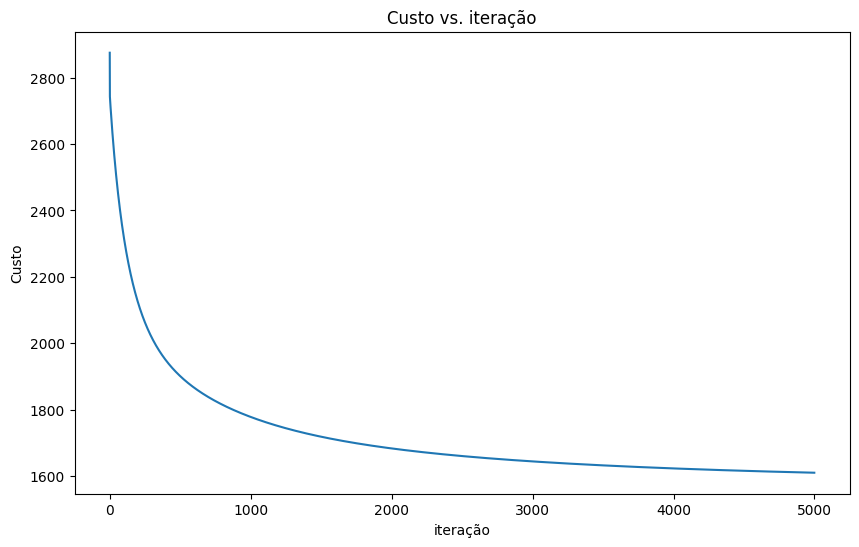

In [105]:
# inicializando novamente os parâmetros
w_inicial = np.zeros_like(w_inicial)
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
# num_iters = 1000
# num_iters = 10000
num_iters = 5000
# alpha 1e-4
alpha = 1.5e-5
# alpha = 1e-6
# Rodando o Método do gradiente
w_final, b_final, J_hist = metodo_do_gradiente(X_trein, y_trein, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(J_hist)
plt.title("Custo vs. iteração")
plt.ylabel('Custo')
plt.xlabel('iteração')
plt.show()


**Pergunta 3:** Ajuste a quantidade de iterações e a taxa de aprendizado `alpha` presentes na célula anterior para que o método do gradiente tenha uma performance satisfatória.

**Resposta:** Os valores testados para $\alpha$ foram valores entre $1 \times 10^{-6}$ e  $1 \times 10^{-4}$, e os valores testados para $num\_iters$ foram valores entre 1000 e 20000. Através de tentativa e erro, além de análise com o auxílio do gráfico, estima-se que os valores adequados de $\alpha$ e $num\_iters$ sejam, respectivamente, $1.5 \times 10^{-5}$ e 5000. Valores de $\alpha$ maiores que $5 \times 10^{-5}$ causam instabilidade e divergência do método do gradiente, indicando que o valor limitante máximo seja menor que $5 \times 10^{-5}$, enquanto que valores de $\alpha$ menores que $1 \times 10^{-5}$ causam covergência muito lenta do método do gradiente. A taxa de aprendizado $\alpha$ adequada é muito importante, pois com uma taxa de aprendizado muito alta, os grandes valores de gradiente poderiam causar oscilações e instabilidade no treinamento, enquanto uma taxa de aprendizado muito baixa tornaria o ajuste lento demais.

In [106]:
# Realizando previsão para os pacientes que estão no conjunto de dados de treinamento
m     = X_trein.shape[0]
y_est = np.zeros(m)
linhas = []
for i in range(m):
    x_vetor  = X_trein[i,:]
    f_wb     = previsao(x_vetor, w_final, b_final)
    y_est[i] = f_wb
    linha = {'Previsão': f_wb, 'Valor alvo': y_trein[i]}
    linhas.append(linha)

df = pd.DataFrame(linhas)

display(df)

,Previsão,Valor alvo
0,200.946626,151
1,79.182609,75
2,175.294502,141
3,155.112077,206
4,127.252137,135
...,...,...
437,194.014872,178
438,122.585209,104
439,144.602185,132
440,191.250308,220


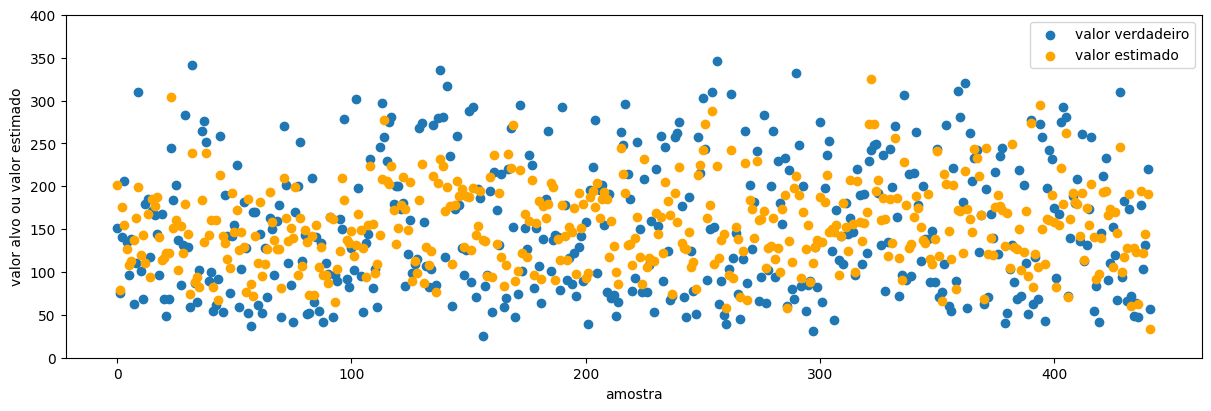

In [107]:
# gerando também um gráfico que compara previsão com valor alvo
fig,ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax.scatter(range(m),y_trein, label = 'valor verdadeiro')
ax.scatter(range(m),y_est, color='orange', label = 'valor estimado')
ax.set_ylabel('valor alvo ou valor estimado')
ax.set_xlabel('amostra')
ax.legend()
plt.ylim(0, 400)
plt.show()

*Estes resultados ainda não são os melhores*! Podemos melhorá-los significativamente por meio do escalonamento de características!


Apenas para termos uma métrica quantitativa para avaliar o resultado obtido, abaixo calculamos o Erro Percentual Absoluto Médio (ou MAPE, do inglês, Mean Absolute Percentage Error). Conforme sugerido pelo próprio nome, o MAPE nos fornece a média, levando em conta todas as amostras que temos, do erro percentual absoluto cometido ao compararmos a previsão feita pelo modelo com o seu valor alvo correspondente.

In [108]:
mape = np.mean(np.abs((y_trein - y_est) / y_trein)) * 100

print("MAPE:", mape, "%")

MAPE: 42.24082828413712 %


## Escalonamento de Características

Existem diferentes formas para se escalonar características:
- Dividindo pelo máximo: Nesse caso, essencialmente divide-se uma característica pelo seu valor máximo. Numa situação mais geral, é possível utilizar tanto o valor máximo como o mínimo, fazendo-se (x-min)/(max-min).
- Normalização pela média: Nesse caso, faz-se (x-media(x))/(max-min)
- Normalização Z-score: Nesse caso, faz-se (x-media(x))/(desvio)


>**OBSERVAÇÃO IMPORTANTE:** Ao normalizar características, é importante armazenar (guardar) os valores usados na normalização, média e desvio padrão no caso da normalização Z-score, por exemplo. Isso porque, após o modelo ser estimado, nós frequentemente queremos usar ele para estimar o preço de casas que não foram usadas no processo de treinamento. Dada uma nova casa com características x, nós devemos primeiro normalizar x usando a média e o desvio padrão que foram previamente computados a partir dos dados de treinamento.


A função abaixo implementa a normalização Z-Score



In [109]:
def normalizacao_zscore(X):
    """
    Normaliza todas as colunas em X

    Argumentos:
      X (ndarray (m,n))     : Dados de entrada, m amostras (linhas), n características (colunas)

    Retorna:
      X_norm (ndarray (m,n)): Matriz X normalizada
      mu (ndarray (n,))     : média de cada característica
      sigma (ndarray (n,))  : desvio padrão de cada característica
    """
    # Encontrando a média de cada característica/coluna
    mu     = np.mean(X, axis=0)                 # mu terá shape (n,) ---> axis=0 indica que a operação será feita ao longo das linhas, para cada coluna
    # Encontrando o desvio padrão de cada característica/coluna
    sigma  = np.std(X, axis=0)                  # sigma terá shape (n,)
    # O comando abaixo subtrai a média mu de cada coluna para cada exemplo, e divide pelo desvio correspondente
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

#O que a nossa função faz pode ser feito usando a biblioteca Scikit learn, por meio dos comandos abaixo
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [110]:
# Normalizando as características a partir da função normalizacao_zscore
X_norm, X_mu, X_sigma = normalizacao_zscore(X_trein)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Intervalo pico a pico por característica/coluna nos dados originais  :{np.ptp(X_trein,axis=0)}")
print(f"Intervalo pico a pico por característica/coluna nos dados escalonados:{np.ptp(X_norm,axis=0)}")

X_mu = [ 48.51809955   1.46832579  26.37579186  94.64701357 189.14027149
 115.43914027  49.78846154   4.07024887   4.64141086  91.260181  ], 
X_sigma = [13.09419021  0.49899574  4.41312086 13.81562831 34.56888013 30.37865755
 12.91956242  1.28898929  0.52179929 11.48332247]
Intervalo pico a pico por característica/coluna nos dados originais  :[ 60.       1.      24.2     71.     204.     200.8     77.       7.09
   2.8489  66.    ]
Intervalo pico a pico por característica/coluna nos dados escalonados:[4.58218485 2.00402514 5.48364769 5.13910757 5.90126146 6.60990367
 5.95995418 5.50043362 5.45976216 5.74746552]


Com a normalização, o intervalo pico a pico para cada característica é reduzido de uma ordem de grandeza de milhares para uma ordem de gradeza de poucas unidades.


A seguir, o método do gradiente é aplicado novamente, mas agora levando em conta as características reescalonadas.

In [111]:
# inicializando parâmetros
w_inicial = np.zeros_like(w_inicial)
b_inicial = 0.0

# parâmetros para rodar o Método do Gradiente:
num_iters  = 1000
alpha      = 0.3
# Rodando o Método do gradiente
w_norm, b_norm, J_hist = metodo_do_gradiente(X_norm, y_trein, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_norm:0.2f},{w_norm} ")




Iteração    0: Custo  7437.69   
Iteração  100: Custo  1436.51   
Iteração  200: Custo  1433.83   
Iteração  300: Custo  1432.23   
Iteração  400: Custo  1431.27   
Iteração  500: Custo  1430.70   
Iteração  600: Custo  1430.36   
Iteração  700: Custo  1430.15   
Iteração  800: Custo  1430.03   
Iteração  900: Custo  1429.96   
b,w encontrados pelo método do gradiente: 152.13,[ -0.46337173 -11.39256291  24.75877724  15.41681247 -34.90635272
  20.47535681   3.56565155   8.06801542  34.7009869    3.22687523] 


In [112]:
# Realizando previsão
m     = X_trein.shape[0]
y_est = np.zeros(m)
linhas = []
for i in range(m):
    x_vetor  = X_norm[i,:]
    f_wb     = previsao(x_vetor, w_norm, b_norm)
    y_est[i] = f_wb
    linha = {'Previsão': f_wb, 'Valor alvo': y_trein[i]}
    linhas.append(linha)

df = pd.DataFrame(linhas)

display(df)

,Previsão,Valor alvo
0,205.925383,151
1,68.241404,75
2,176.671089,141
3,166.623106,206
4,128.419608,135
...,...,...
437,192.918979,178
438,101.186515,104
439,121.456747,132
440,211.680987,220


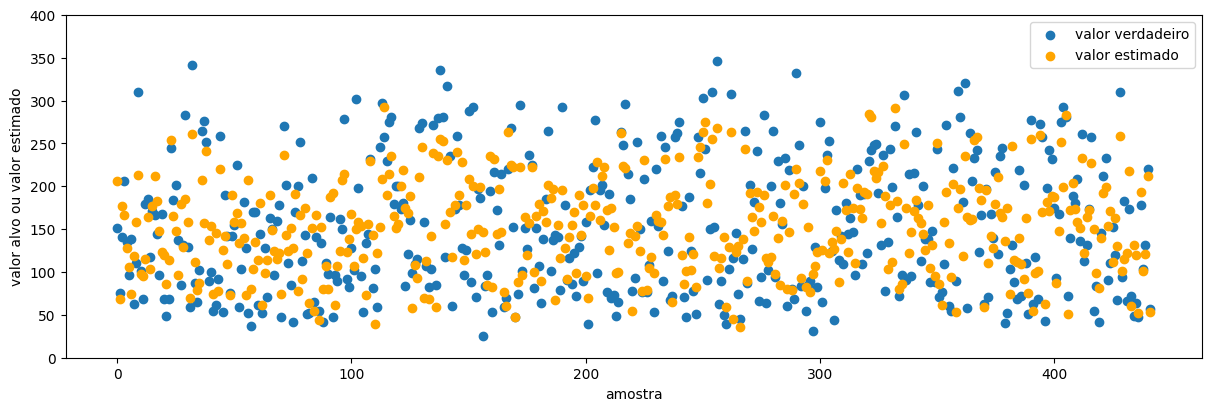

In [113]:
# gerando também um gráfico que compara previsão com valor alvo
fig,ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax.scatter(range(m),y_trein, label = 'valor verdadeiro')
ax.scatter(range(m),y_est, color='orange', label = 'valor estimado')
ax.set_ylabel('valor alvo ou valor estimado')
ax.set_xlabel('amostra')
ax.legend()
plt.ylim(0, 400)
plt.show()

Calculo do novo valor de MAPE

In [114]:
mape = np.mean(np.abs((y_trein - y_est) / y_trein)) * 100

print("MAPE:", mape, "%")

MAPE: 38.77136182877503 %


**Pergunta 4:** Compare este novo valor de MAPE com aquele que havia sido obtido anteriormente. Quais conclusões podem ser feitas?

**Resposta:** O *MAPE* mede a precisão de um modelo em termos percentuais, avaliando o erro médio absoluto entre os valores previstos e os valores reais em relação aos valores reais. O *MAPE* sem escalonamento das características é de 42.24 %, enquanto com escalonamento de características é de 38.77%. Com o escalonamento de características, o erro médio absoluto é menor, indicando que o escalonamento de caracteristicas é benéfico para o modelo, melhorando a capacidade de previsão do mesmo. O escalonamento de características ou normalização das variáveis independentes é um passo importante para algoritmos de aprendizado de máquina que utilizam gradientes, pois evita a dominância de variáveis com escalas maiores.  

## Previsão

Agora que temos um modelo, podemos utilizá-lo para realizar a previsão de como o quadro de diabetes de novos pacientes irá evoluir ao longo do próximo ano.

Abaixo o modelo estimado é aplicado usando os dados de um novo paciente, que possui as seguintes características:

- Idade: 59
- Sexo: Masculino
- IMC: 32,1
- Pressão Arterial: 101 mmHg
- Marcadores sanguíneos (S1-S6): [157, 93.2, 38, 4, 4.8598, 87]

In [115]:
x1  = 59
x2  = 1
x3  = 32.1
x4  = 101
x5  = 157
x6  = 93.2
x7  = 38
x8  = 4
x9  = 4.8598
x10 = 87

x_paciente      = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])
x_paciente_norm = (x_paciente - X_mu) / X_sigma
print(x_paciente_norm)
y_est_novo = np.dot(x_paciente_norm, w_norm) + b_norm
print(f" Evolução prevista do quadro de diabetes para este paciente: = {y_est_novo:0.2f}")

[ 0.80050009 -0.93853666  1.29708846  0.45984057 -0.92974581 -0.73206462
 -0.91245053 -0.05449919  0.41853093 -0.37098854]
 Evolução prevista do quadro de diabetes para este paciente: = 228.76


**Pergunta 5:** Com as suas próprias palavras, faça uma análise da validade (ou não) dessa previsão considerando o MAPE apresentado pelo modelo durante seu treinamento.

**Resposta:** Com um *MAPE* de 38.77%, o resultado pode ser útil, desde que interpretado com cautela, sendo que o valor real pode divergir cerca de 39%, levando a falsas interpretações acerca da evolução da diabetes. Relembrando os critérios de avaliação do problema:

- Pontuações mais altas (por exemplo, 150–200) indicam piora do diabetes e uma probabilidade crescente de complicações.
- Pontuação intermediária (por exemplo, 50-150) indica que a doença do paciente progrediu moderadamente ao longo do ano.
- Pontuações mais baixas (por exemplo, 20–50) indicam progressão estável ou mínima. Em geral, uma pontuação dentro desse intervalo indica que o paciente provavelmente está gerenciando bem a doença.

Com a evolução prevista em 228.7, o valor real estará, segundo o erro médio absoluto, entre 140.03 e 317.37, o que não descarta a possibilidade de piora da diabetes. Embora 140.03 esteja abaixo das pontuações altas, o fato do limitante superior ser elevado reforça a estimativa de piora da diabetes. Contudo, o fato do *MAPE* ser elevado não descarta a possibilidade de melhora no modelo: análise de novas características, redução de dimensionalidade através análise *PCA* ou transformações matemáticas podem auxiliar no aprimoramento do modelo visando torná-lo mais preciso.

# Fim